In [1]:
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [2]:
data = """The Continuous Bag of Words is a natural language processing technique to generate word embeddings. Word embeddings are useful for many NLP tasks as they represent semantics and structural connections amongst words in a language."""

In [3]:
data

'The Continuous Bag of Words is a natural language processing technique to generate word embeddings. Word embeddings are useful for many NLP tasks as they represent semantics and structural connections amongst words in a language.'

In [4]:
sentences = data.split('.')

In [5]:
sentences

['The Continuous Bag of Words is a natural language processing technique to generate word embeddings',
 ' Word embeddings are useful for many NLP tasks as they represent semantics and structural connections amongst words in a language',
 '']

In [6]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

In [7]:
clean_sent

['the continuous bag of words is a natural language processing technique to generate word embeddings',
 'word embeddings are useful for many nlp tasks as they represent semantics and structural connections amongst words in a language']

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[6, 7, 8, 9, 1, 10, 2, 11, 3, 12, 13, 14, 15, 4, 5], [4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 1, 30, 2, 3]]


In [9]:
index_to_word = {}
word_to_index = {}

In [10]:
for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
    #     print(word_in_sentence)
        
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

In [11]:
 print(index_to_word, "\n")
 print(word_to_index)

{6: 'the', 7: 'continuous', 8: 'bag', 9: 'of', 1: 'words', 10: 'is', 2: 'a', 11: 'natural', 3: 'language', 12: 'processing', 13: 'technique', 14: 'to', 15: 'generate', 4: 'word', 5: 'embeddings', 16: 'are', 17: 'useful', 18: 'for', 19: 'many', 20: 'nlp', 21: 'tasks', 22: 'as', 23: 'they', 24: 'represent', 25: 'semantics', 26: 'and', 27: 'structural', 28: 'connections', 29: 'amongst', 30: 'in'} 

{'the': 6, 'continuous': 7, 'bag': 8, 'of': 9, 'words': 1, 'is': 10, 'a': 2, 'natural': 11, 'language': 3, 'processing': 12, 'technique': 13, 'to': 14, 'generate': 15, 'word': 4, 'embeddings': 5, 'are': 16, 'useful': 17, 'for': 18, 'many': 19, 'nlp': 20, 'tasks': 21, 'as': 22, 'they': 23, 'represent': 24, 'semantics': 25, 'and': 26, 'structural': 27, 'connections': 28, 'amongst': 29, 'in': 30}


In [12]:
 vocab_size = len(tokenizer.word_index) + 1
 emb_size = 10
 context_size = 2

In [13]:
contexts = []
targets = []
for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
         #         print(context)
        contexts.append(context)
        targets.append(target)

In [14]:
 print(contexts, "\n")
 print(targets)

[[6, 7, 9, 1], [7, 8, 1, 10], [8, 9, 10, 2], [9, 1, 2, 11], [1, 10, 11, 3], [10, 2, 3, 12], [2, 11, 12, 13], [11, 3, 13, 14], [3, 12, 14, 15], [12, 13, 15, 4], [13, 14, 4, 5], [4, 5, 17, 18], [5, 16, 18, 19], [16, 17, 19, 20], [17, 18, 20, 21], [18, 19, 21, 22], [19, 20, 22, 23], [20, 21, 23, 24], [21, 22, 24, 25], [22, 23, 25, 26], [23, 24, 26, 27], [24, 25, 27, 28], [25, 26, 28, 29], [26, 27, 29, 1], [27, 28, 1, 30], [28, 29, 30, 2], [29, 1, 2, 3]] 

[8, 9, 1, 10, 2, 11, 3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 1, 30]


In [15]:
#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['the', 'continuous', 'of', 'words']  ->  bag
['continuous', 'bag', 'words', 'is']  ->  of
['bag', 'of', 'is', 'a']  ->  words
['of', 'words', 'a', 'natural']  ->  is
['words', 'is', 'natural', 'language']  ->  a


In [16]:
X = np.array(contexts)
Y = np.array(targets)

In [17]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
 ])

C:\Users\vaidi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.compile(loss='sparse_categorical_crossentropy', 
optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=80)

Epoch 1/80

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 3.4342
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2593 - loss: 3.4292
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2222 - loss: 3.4247
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1852 - loss: 3.4201
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1852 - loss: 3.4150
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1481 - loss: 3.4092
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1481 - loss: 3.4025
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1481 - loss: 3.3949
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1481 - loss: 3.3862
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1481 - loss: 3.3764
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1481 - loss: 3.3652
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1481 - loss: 3.352

<Axes: >

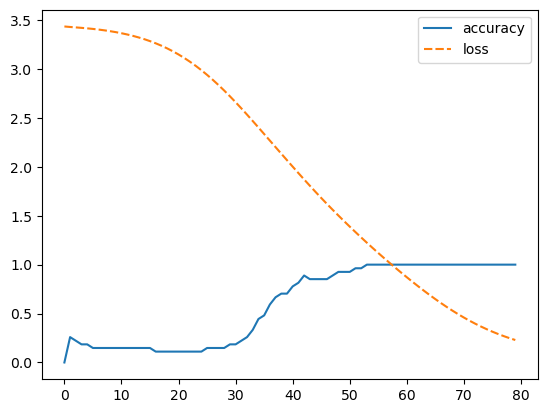

In [38]:
 import seaborn as sns
 sns.lineplot(model.history.history)

In [60]:
from sklearn.decomposition import PCA
embeddings = model.get_weights()[0]
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [86]:
# test model: select some sentences from above paragraph
test_sentenses = [
    "continuous bag words is",
    "natural language technique to",
    "technique to word embeddings",
]


In [88]:
for sent in test_sentenses:
    test_words = sent.split(" ")

    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
    

    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
pred  ['continuous', 'bag', 'words', 'is'] 
= of 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
pred  ['natural', 'language', 'technique', 'to'] 
= processing 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
pred  ['technique', 'to', 'word', 'embeddings'] 
= generate 


